In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

# Prepocess: build dataset for local testing.
Run it the first time to build:

stock_dict_file = './tmp/stock_dict.pkl'

time_dict_file = './tmp/time_dict.pkl'

np_data_file  = './tmp/data.npz'

In [ ]:
train_file = 'd:/Lab/dataset/it/traing_data_new.csv'

stock_dict = {}

def stock_to_id(stock):
    if stock not in stock_dict.keys():
        stock_dict[stock] = len(stock_dict.keys())
    return stock_dict[stock]
            
time_dict = {}

def time_to_id(time):
    if time not in time_dict.keys():
        time_dict[time] = len(time_dict.keys())
    return time_dict[time]

with open(train_file) as f:
    l = f.readline()
    #print(l)
    for l in f:
        #print(l.strip().split(','))
        l = l.strip().split(',')
        _id = stock_to_id(int(l[1]))
        time_to_id(l[2] + '-' + l[3])
        
np_data = np.ones((112547, 512))*-1

with open(train_file) as f:
    l = f.readline()
    for l in f:
        #print(l.strip().split(','))
        l = l.strip().split(',')
        _id = stock_to_id(int(l[1]))
        _t = time_to_id(l[2]+'-'+l[3])
        _p = float(l[-1])
        np_data[_t, _id] = _p

for j in range(512):
    if np_data[0, j] < 0:
        k = np.min(np.where(np_data[:, j] > 0))
        #print(j, k)
        #break
        np_data[0, j] = np_data[k, j]
        
for i in range(1, 112547):
    for j in range(512):
        if np_data[i, j] < 0:
            np_data[i, j] = np_data[i-1, j]
            
stock_dict_file = './tmp/stock_dict.pkl'
time_dict_file = './tmp/time_dict.pkl'
np_data_file  = './tmp/data.npz'

with open(stock_dict_file, 'wb') as f:
    pickle.dump(stock_dict, f)

with open(time_dict_file, 'wb') as f:
    pickle.dump(time_dict, f)

with open(np_data_file, 'wb') as f:
    np.save(f, np_data)

# Solution for task 1

In [2]:
test_file = 'd:/Lab/dataset/it/testing_data.csv'

In [3]:
import pickle

stock_dict_file = './tmp/stock_dict.pkl'
time_dict_file = './tmp/time_dict.pkl'
np_data_file  = './tmp/data.npz'

with open(stock_dict_file, 'rb') as f:
    stock_dict = pickle.load(f)

with open(np_data_file, 'rb') as f:
    train_data = np.load(f)

In [4]:
pred_len = 5543

train_set = train_data[:-pred_len]
valid_set = train_data[-pred_len:]

def mirror_pred(pred_len=pred_len, m=512, train=train_set):
    pred_data = np.zeros((pred_len, m))
    for i in range(m):
        for j in range(pred_len):
            pred_data[j, i] = np.mean(train[-(j+1):, i])
    return pred_data

def rmse(pred, gt):
    return np.sqrt(np.mean((pred-gt)**2))

In [45]:
pred = mirror_pred()
err = rmse(pred, valid_set)
print(err)

3.4510835551335384


In [38]:
def var_pred(var_len, k, pred_len=pred_len, m=512, train=train_set):
    pred_data = np.zeros((pred_len, m))
    for i in range(m):
        var = np.var(train[-var_len:, i])
        print(k*var*pred_len)
        for j in range(pred_len):
            L = int(np.ceil(j*k*var))
            pred_data[j, i] = np.mean(train[-(L+1):, i])
    return pred_data    

In [54]:
for var_len in [500]:
    for k in [10]:
        #print(var_len, k)
        pred = var_pred(var_len, k)
        err = rmse(pred, valid_set)
        print(err)

500 10
4027.8671564480005
17.995072696667208


# Demonstration
Show the predtion of 100 periods for the 5-th stock.

In [46]:
pred1 = pred

In [29]:
l=5000

y1 = train_set[:, 6]

In [49]:
y2 = pred1[:l,6]

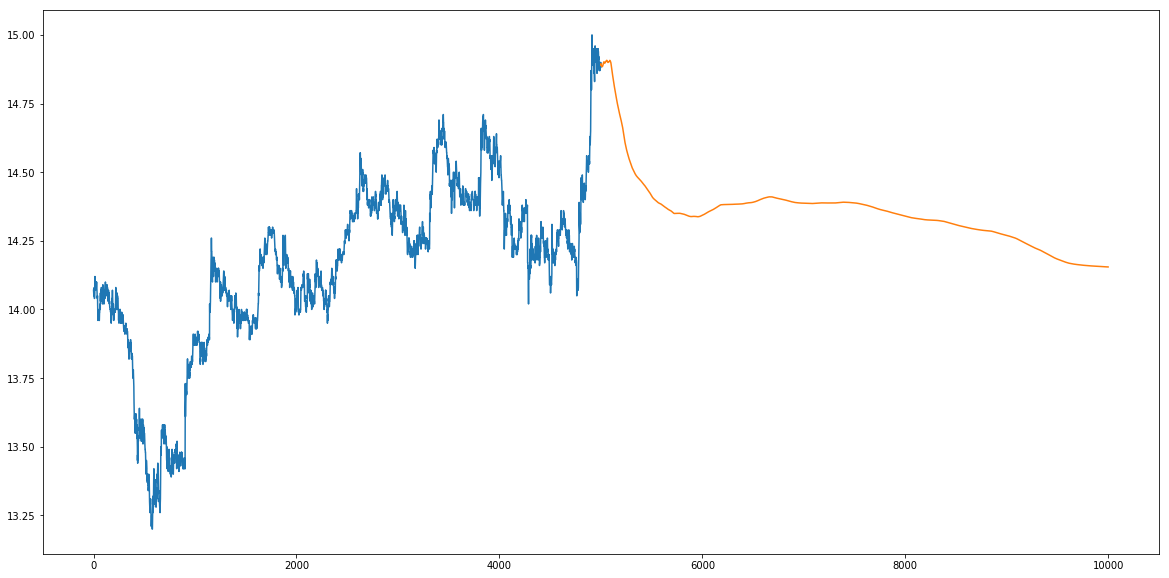

In [52]:
plt.figure(figsize=(20, 10))
plt.plot(range(0,l), y1[-l:])
plt.plot(range(l, 2*l), y2)
plt.show()

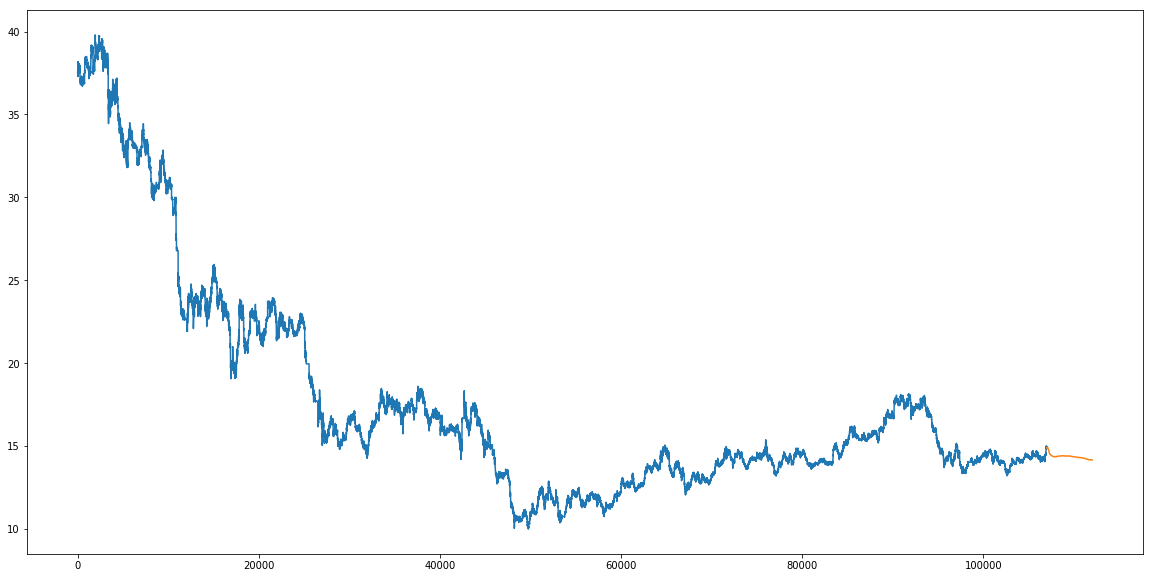

In [53]:
plt.figure(figsize=(20, 10))
plt.plot(range(0,len(y1)), y1)
plt.plot(range(len(y1), len(y1)+l), y2)
plt.show()

4027.8671564480005


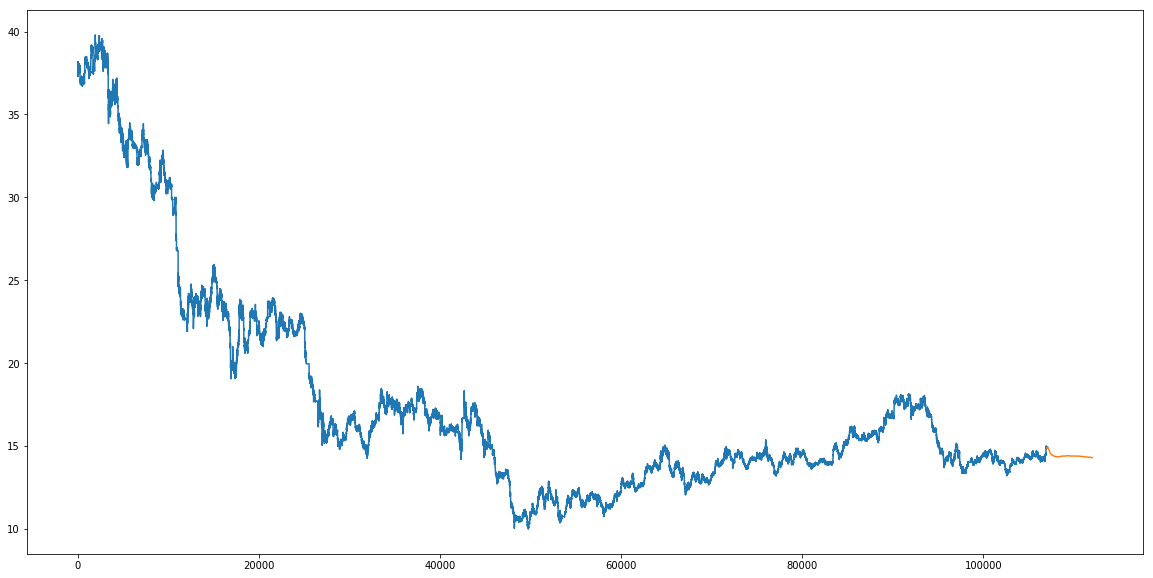

In [41]:
pred1 = var_pred(500, 10)
y2 = pred1[:l,6]
plt.figure(figsize=(20, 10))
plt.plot(range(0,len(y1)), y1)
plt.plot(range(len(y1), len(y1)+l), y2)
plt.show()

40278.67156448


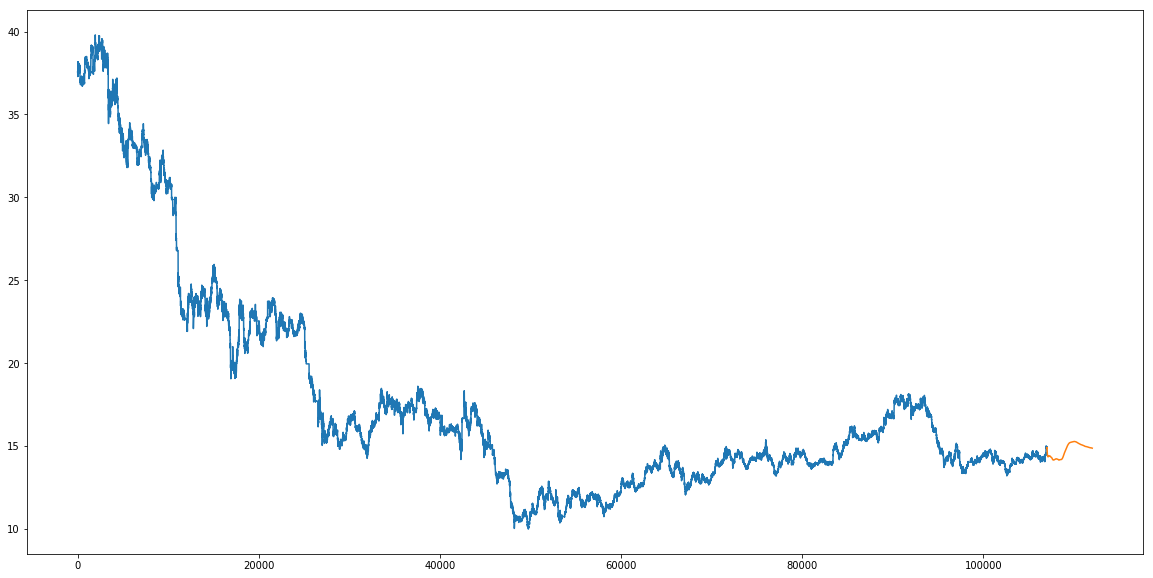

In [44]:
pred1 = var_pred(500, 100)
y2 = pred1[:l,6]
plt.figure(figsize=(20, 10))
plt.plot(range(0,len(y1)), y1)
plt.plot(range(len(y1), len(y1)+l), y2)
plt.show()

201393.35782240002


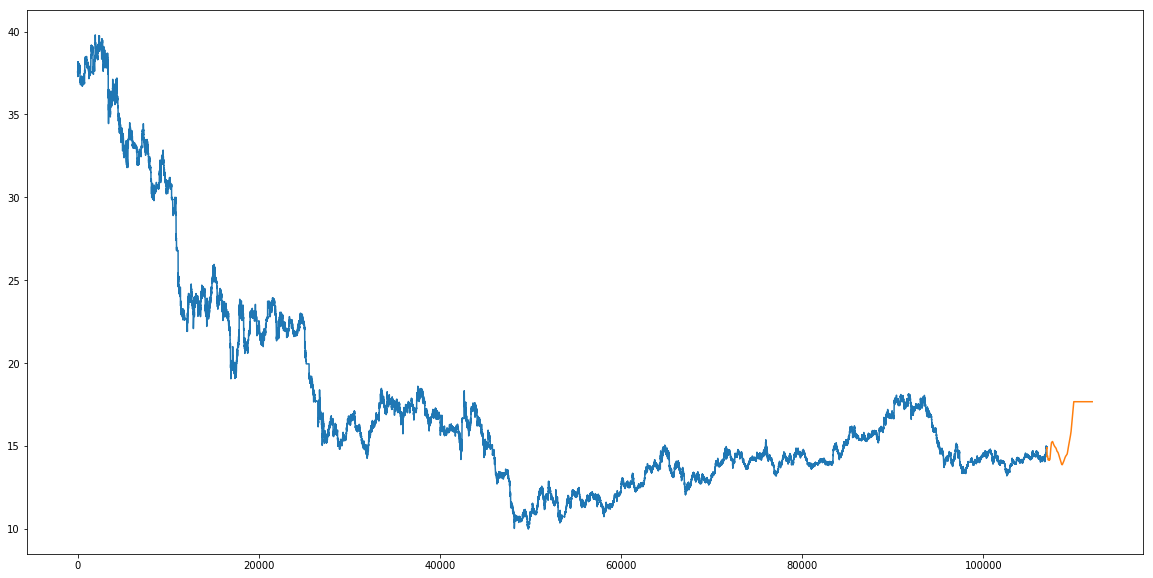

In [43]:
pred1 = var_pred(500, 500)
y2 = pred1[:l,6]
plt.figure(figsize=(20, 10))
plt.plot(range(0,len(y1)), y1)
plt.plot(range(len(y1), len(y1)+l), y2)
plt.show()

Pred Test

In [ ]:
pred = var_pred(, , train=train_data)

In [ ]:
test_out_file = './tmp/testing_output.csv'
with open(test_file) as f, open(test_out_file, 'w') as f_out:
    l = f.readline()
    f_out.write(l)
    for ll in f:
        l = ll.strip().split(',')
        time_id = time_to_id(l[2] + '-' + l[3])
        stock_id = stock_to_id(int(l[1]))
        _p = pred[time_id, stock_id]
        res = ll.strip() + ', ' + ('%f' % _p)
        print(res)
        break